In [1]:
#import thư viện
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
df = pd.read_csv("datasets_motels.csv")
df.head(5)

,id_motels,tennhatro,diachi,toalac,danhgia,gia,dientich,noidung,luotxem
0,0,Cho Thuê Phòng Trọ Có Sẵn Nội Thất,"Địa chỉ: Hẻm 278, đường Tầm Vu",Ninh Kiều,5.0,2700000,DT: 27.00 m²,Mùa nhập học đến rồi_Các bạn sinh viên đã tìm ...,78796
1,1,Cho thuê phòng trọ mới thoáng mát,"Địa chỉ: 156b1. Đường Nguyễn Tri Phương, p An ...",Ninh Kiều,1.2,1000000,DT: 24.00 m²,"Cho thuê phòng trọ đường Nguyễn Tri Phương, p...",1891
2,2,"NHÀ TRỌ ĐƯỜNG TẦM VU , KẾ TU VIỆN , NHÀ HÀNG M...","Địa chỉ: 360 Tầm Vu , phường Hưng Lợi , quận N...",Ninh Kiều,2.7,1200000,DT: 15.00 m²,"NHÀ TRỌ ĐƯỜNG TẦM VU , KẾ TU VIỆN , NHÀ HÀNG M...",13095
3,3,"NHÀ TRỌ ĐƯỜNG TẦM VU , GẦN NHÀ HÀNG MÊKONG , C...","Địa chỉ: 360A ,ĐƯỜNG TẦM VU , PHƯỜNG HƯNG LỢI ...",Ninh Kiều,3.0,1200000,DT: 15.00 m²,"NHÀ TRỌ ĐƯỜNG TẦM VU , KẾ TU VIỆN , NHÀ HÀNG M...",21811
4,4,"Phòng trọ, nhà nghỉ Hoàng Phương Đông cần cho ...",Địa chỉ: 14R Trần Văn Sắc,Ninh Kiều,1.5,2000000,DT: 25.00 m²,Cho thuê phòng trọ mới sạch đẹp trang thiết bị...,8011


In [3]:
df.isna().sum()

id_motels    0
tennhatro    0
diachi       1
toalac       0
danhgia      0
gia          0
dientich     0
noidung      0
luotxem      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_motels  408 non-null    int64  
 1   tennhatro  408 non-null    object 
 2   diachi     407 non-null    object 
 3   toalac     408 non-null    object 
 4   danhgia    408 non-null    float64
 5   gia        408 non-null    int64  
 6   dientich   408 non-null    object 
 7   noidung    408 non-null    object 
 8   luotxem    408 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 28.8+ KB


In [5]:
#Phân bố nơi tọa lạc của các nhà trọ
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=df.toalac.value_counts().index, y=df.toalac.value_counts().tolist())])
fig.update_layout(
    title="Phân bố nơi tọa lạc của các nhà trọ",
    xaxis_title="Nơi tọa lạc",
    yaxis_title="Số lượng")
fig.show()

In [6]:
#Phân bố đánh giá của các nhà trọ
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=df.danhgia.value_counts().index, y=df.danhgia.value_counts().tolist())])
fig.update_layout(
    title="Phân bố đánh giá của các nhà trọ",
    xaxis_title="Đánh giá",
    yaxis_title="Số lượng")
fig.show()

In [7]:
#Phân bố diện tích của các nhà trọ
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=df.dientich.value_counts().index, y=df.dientich.value_counts().tolist())])
fig.update_layout(
    title="Phân bố diện tích của các nhà trọ",
    xaxis_title="Diện tích",
    yaxis_title="Số lượng")
fig.show()

In [8]:
def sentiment(gia):
  if gia in range(0,1000000):
    return 'Dưới 1 triệu'
  elif gia in range(1000001,2000000):
    return '1 triệu - 2 triệu'
  else:
    return 'Trên 2 triệu'

df['gia1'] = df['gia'].apply(sentiment)
df

,id_motels,tennhatro,diachi,toalac,danhgia,gia,dientich,noidung,luotxem,gia1
0,0,Cho Thuê Phòng Trọ Có Sẵn Nội Thất,"Địa chỉ: Hẻm 278, đường Tầm Vu",Ninh Kiều,5.0,2700000,DT: 27.00 m²,Mùa nhập học đến rồi_Các bạn sinh viên đã tìm ...,78796,Trên 2 triệu
1,1,Cho thuê phòng trọ mới thoáng mát,"Địa chỉ: 156b1. Đường Nguyễn Tri Phương, p An ...",Ninh Kiều,1.2,1000000,DT: 24.00 m²,"Cho thuê phòng trọ đường Nguyễn Tri Phương, p...",1891,Trên 2 triệu
2,2,"NHÀ TRỌ ĐƯỜNG TẦM VU , KẾ TU VIỆN , NHÀ HÀNG M...","Địa chỉ: 360 Tầm Vu , phường Hưng Lợi , quận N...",Ninh Kiều,2.7,1200000,DT: 15.00 m²,"NHÀ TRỌ ĐƯỜNG TẦM VU , KẾ TU VIỆN , NHÀ HÀNG M...",13095,1 triệu - 2 triệu
3,3,"NHÀ TRỌ ĐƯỜNG TẦM VU , GẦN NHÀ HÀNG MÊKONG , C...","Địa chỉ: 360A ,ĐƯỜNG TẦM VU , PHƯỜNG HƯNG LỢI ...",Ninh Kiều,3.0,1200000,DT: 15.00 m²,"NHÀ TRỌ ĐƯỜNG TẦM VU , KẾ TU VIỆN , NHÀ HÀNG M...",21811,1 triệu - 2 triệu
4,4,"Phòng trọ, nhà nghỉ Hoàng Phương Đông cần cho ...",Địa chỉ: 14R Trần Văn Sắc,Ninh Kiều,1.5,2000000,DT: 25.00 m²,Cho thuê phòng trọ mới sạch đẹp trang thiết bị...,8011,Trên 2 triệu
...,...,...,...,...,...,...,...,...,...,...
403,403,NHÀ TRO MINH LUAN,"Địa chỉ: Cầu Lê Bình, Thường Thạnh, Cái Răng, ...",Cái Răng,5.0,700000,DT: 32.00 m²,Cho thuê phòng trọ mới sạch đẹp trang thiết bị...,34712,Dưới 1 triệu
404,404,Nhà trọ Ngọc Huyền,"Địa chỉ: 2PJW+FWF, Phường An Khánh, Ninh Kiều,...",Ninh Kiều,0.0,1000000,DT: 45.00 m²,Nhà trọ - Thoáng mát - An ninh - Wc trong - Wi...,123569,Trên 2 triệu
405,405,Nhà Trọ Minh Quân,"Địa chỉ: 25 Đường số 1, Khu Nhà Ở Cán Bộ Giáo ...",Ninh Kiều,0.0,1500000,DT: 25.00 m²,"Nhà trọ cao ráo, thoáng mát, sạch đẹp, thiết k...",0,1 triệu - 2 triệu
406,406,Phòng Trọ Sinh Viên\r,"Địa chỉ: K4 Nguyễn Ngọc Trai, An Phú, Ninh Kiề...",Ninh Kiều,0.0,1000000,DT: 20.00 m²,"Phòng trọ đẹp, sạch sẽ, thoáng mát, yên tĩnh, ...",1156,Trên 2 triệu


In [9]:
#Phân bố giá của các nhà trọ
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=df.gia1.value_counts().index, y=df.gia1.value_counts().tolist())])
fig.update_layout(
    title="Phân bố giá của các nhà trọ",
    xaxis_title="Giá",
    yaxis_title="Số lượng")
fig.show()

In [ ]:
#plt.figure(figsize=(25,20))
#sns.countplot(x= df['gia1'])

In [10]:
def sentiment(luotxem):
  if luotxem in range(0,1000):
    return 'Thấp'
  elif luotxem in range(1001,10000):
    return 'Trung Bình'
  elif luotxem in range(10001,50000):
    return 'Khá'
  elif luotxem in range(50001,70000):
    return 'Tốt'
  else:
    return 'Rất tốt' 

In [11]:
df['luotxem1'] = df['luotxem'].apply(sentiment)
df.head()

,id_motels,tennhatro,diachi,toalac,danhgia,gia,dientich,noidung,luotxem,gia1,luotxem1
0,0,Cho Thuê Phòng Trọ Có Sẵn Nội Thất,"Địa chỉ: Hẻm 278, đường Tầm Vu",Ninh Kiều,5.0,2700000,DT: 27.00 m²,Mùa nhập học đến rồi_Các bạn sinh viên đã tìm ...,78796,Trên 2 triệu,Rất tốt
1,1,Cho thuê phòng trọ mới thoáng mát,"Địa chỉ: 156b1. Đường Nguyễn Tri Phương, p An ...",Ninh Kiều,1.2,1000000,DT: 24.00 m²,"Cho thuê phòng trọ đường Nguyễn Tri Phương, p...",1891,Trên 2 triệu,Trung Bình
2,2,"NHÀ TRỌ ĐƯỜNG TẦM VU , KẾ TU VIỆN , NHÀ HÀNG M...","Địa chỉ: 360 Tầm Vu , phường Hưng Lợi , quận N...",Ninh Kiều,2.7,1200000,DT: 15.00 m²,"NHÀ TRỌ ĐƯỜNG TẦM VU , KẾ TU VIỆN , NHÀ HÀNG M...",13095,1 triệu - 2 triệu,Khá
3,3,"NHÀ TRỌ ĐƯỜNG TẦM VU , GẦN NHÀ HÀNG MÊKONG , C...","Địa chỉ: 360A ,ĐƯỜNG TẦM VU , PHƯỜNG HƯNG LỢI ...",Ninh Kiều,3.0,1200000,DT: 15.00 m²,"NHÀ TRỌ ĐƯỜNG TẦM VU , KẾ TU VIỆN , NHÀ HÀNG M...",21811,1 triệu - 2 triệu,Khá
4,4,"Phòng trọ, nhà nghỉ Hoàng Phương Đông cần cho ...",Địa chỉ: 14R Trần Văn Sắc,Ninh Kiều,1.5,2000000,DT: 25.00 m²,Cho thuê phòng trọ mới sạch đẹp trang thiết bị...,8011,Trên 2 triệu,Trung Bình


In [12]:
#Phân bố lượt xem của các nhà trọ
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=df.luotxem1.value_counts().index, y=df.luotxem1.value_counts().tolist())])
fig.update_layout(
    title="Phân bố lượt xem của các nhà trọ",
    xaxis_title="Lượt xem",
    yaxis_title="Số lượng")
fig.show()

In [ ]:
#plt.figure(figsize=(16,4))
#sns.countplot(x= df['luotxem1'])

In [13]:
df = pd.read_csv("datasets_reviews_motels.csv")
df.head(5)

,id_user,id_motels,rating,views
0,0,0,4,"nhà trọ đẹp, chủ trọ tốt tính vui vẻ, an ninh ..."
1,1,0,2,Vị trí Mặt tiền đường Trần Nam Phú (Lộ ngân hà...
2,2,0,3,nhà trọ toàn nữ. Nhà tui chứ đâu kkk
3,3,0,5,Thoáng mát. Giá bình dân
4,4,1,5,"Nhà trọ sạch sẽ, an toàn giá cả hợp lí, với lạ..."


In [14]:
sentiments = []
for review in df['views']:
    if TextBlob(review).sentiment.polarity < 0:
        sentiments.append("Negative")
    if TextBlob(review).sentiment.polarity == 0:
        sentiments.append("Neutral")
    if TextBlob(review).sentiment.polarity > 0:
        sentiments.append("Positive")
df["Sentiment"] = np.array(sentiments)

In [15]:
df

,id_user,id_motels,rating,views,Sentiment
0,0,0,4,"nhà trọ đẹp, chủ trọ tốt tính vui vẻ, an ninh ...",Neutral
1,1,0,2,Vị trí Mặt tiền đường Trần Nam Phú (Lộ ngân hà...,Neutral
2,2,0,3,nhà trọ toàn nữ. Nhà tui chứ đâu kkk,Neutral
3,3,0,5,Thoáng mát. Giá bình dân,Neutral
4,4,1,5,"Nhà trọ sạch sẽ, an toàn giá cả hợp lí, với lạ...",Positive
...,...,...,...,...,...
2440,318,403,3,"Qua rộng, mát mẻ, chủ trọ hiền, tốt bụng ok hế...",Positive
2441,319,403,3,"Nhà trọ sạch sẽ, an toàn giá cả hợp lí, với lạ...",Positive
2442,320,403,4,"Nhà trọ hiện đại, sạch sẽ, an ninh, yên tĩnh, ...",Neutral
2443,321,403,3,"Mọi thứ tuyệt vời. An ninh, sạch sẽ, thân thiệ...",Neutral


In [16]:
df['rating'].value_counts()

5    1249
4     645
3     226
2     180
1     144
0       1
Name: rating, dtype: int64

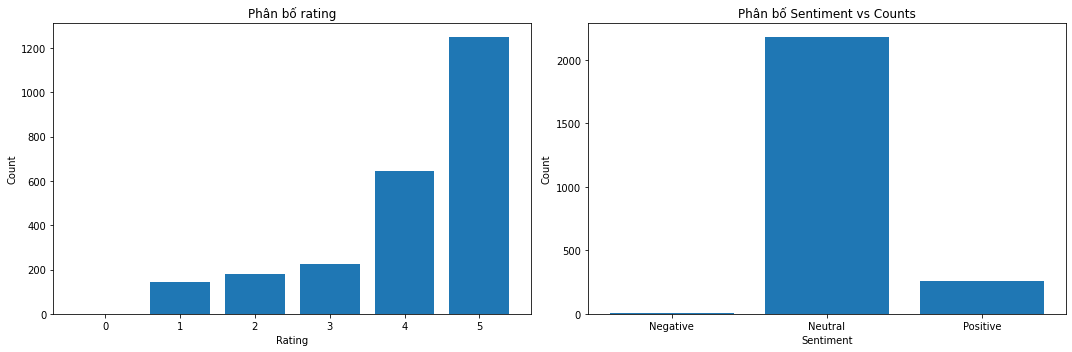

In [17]:
#Phân bố độ rating và giá trị tình cảm đánh giá
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x_axis,counts = np.unique(df['rating'],return_counts=True)
plt.bar([str(i) for i in x_axis],counts)
plt.title("Phân bố rating")
plt.xlabel("Rating")
plt.ylabel("Count")

plt.subplot(1,2,2)
x_axis,counts = np.unique(df['Sentiment'],return_counts=True)
plt.bar(x_axis,counts)
plt.title("Phân bố Sentiment vs Counts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()

In [18]:
df['Word_count']= df['views'].map(lambda x: len(x.split()))
df

,id_user,id_motels,rating,views,Sentiment,Word_count
0,0,0,4,"nhà trọ đẹp, chủ trọ tốt tính vui vẻ, an ninh ...",Neutral,21
1,1,0,2,Vị trí Mặt tiền đường Trần Nam Phú (Lộ ngân hà...,Neutral,20
2,2,0,3,nhà trọ toàn nữ. Nhà tui chứ đâu kkk,Neutral,9
3,3,0,5,Thoáng mát. Giá bình dân,Neutral,5
4,4,1,5,"Nhà trọ sạch sẽ, an toàn giá cả hợp lí, với lạ...",Positive,22
...,...,...,...,...,...,...
2440,318,403,3,"Qua rộng, mát mẻ, chủ trọ hiền, tốt bụng ok hế...",Positive,40
2441,319,403,3,"Nhà trọ sạch sẽ, an toàn giá cả hợp lí, với lạ...",Positive,38
2442,320,403,4,"Nhà trọ hiện đại, sạch sẽ, an ninh, yên tĩnh, ...",Neutral,25
2443,321,403,3,"Mọi thứ tuyệt vời. An ninh, sạch sẽ, thân thiệ...",Neutral,18


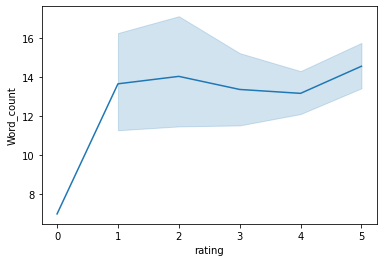

In [19]:
sns.lineplot(x='rating', data=df, y='Word_count')

In [20]:
from textblob import TextBlob

In [21]:
def polarity(text):
    blob= TextBlob(text)
    blob.sentiment
    polarity= blob.sentiment.polarity
    
    return polarity

def subjectivity(text):
    blob= TextBlob(text)
    blob.sentiment
    subjectivity= blob.sentiment.subjectivity
    
    return subjectivity

In [22]:
df['Polarity']= df['views'].apply(polarity)
df['Subjectivity']= df['views'].apply(subjectivity)
df

,id_user,id_motels,rating,views,Sentiment,Word_count,Polarity,Subjectivity
0,0,0,4,"nhà trọ đẹp, chủ trọ tốt tính vui vẻ, an ninh ...",Neutral,21,0.0,0.0
1,1,0,2,Vị trí Mặt tiền đường Trần Nam Phú (Lộ ngân hà...,Neutral,20,0.0,0.0
2,2,0,3,nhà trọ toàn nữ. Nhà tui chứ đâu kkk,Neutral,9,0.0,0.0
3,3,0,5,Thoáng mát. Giá bình dân,Neutral,5,0.0,0.0
4,4,1,5,"Nhà trọ sạch sẽ, an toàn giá cả hợp lí, với lạ...",Positive,22,0.5,1.0
...,...,...,...,...,...,...,...,...
2440,318,403,3,"Qua rộng, mát mẻ, chủ trọ hiền, tốt bụng ok hế...",Positive,40,0.5,0.5
2441,319,403,3,"Nhà trọ sạch sẽ, an toàn giá cả hợp lí, với lạ...",Positive,38,0.5,1.0
2442,320,403,4,"Nhà trọ hiện đại, sạch sẽ, an ninh, yên tĩnh, ...",Neutral,25,0.0,0.0
2443,321,403,3,"Mọi thứ tuyệt vời. An ninh, sạch sẽ, thân thiệ...",Neutral,18,0.0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



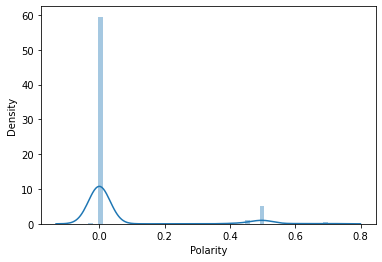

In [23]:
sns.distplot(df['Polarity'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



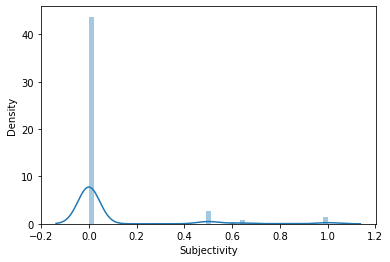

In [24]:
sns.distplot(df['Subjectivity'])

In [25]:
#Phân bố đánh giá ở lớp Polarity
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=df.rating.value_counts().index, y=df.Polarity.value_counts().tolist())])
fig.update_layout(
    title="Phân bố đánh giá ở lớp Polarity",
    xaxis_title="Đánh giá",
    yaxis_title="Số lượng")
fig.show()

In [ ]:
#sns.boxplot(x='rating',y='Polarity', data=df, whis=2.5, fliersize= 5)


In [26]:
#Phân bố đánh giá ở lớp Subjectivity
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=df.rating.value_counts().index, y=df.Subjectivity.value_counts().tolist())])
fig.update_layout(
    title="Phân bố đánh giá ở lớp Subjectivity",
    xaxis_title="Đánh giá",
    yaxis_title="Số lượng")
fig.show()

In [ ]:
#sns.boxplot(x='rating',y='Subjectivity', data=df, whis=2 )

In [ ]:
# import matplotlib.pyplot as plt
# plt.plot(history.history['loss'], label='loss')
# plt.plot(history.history['val_loss'], label='val_loss')
# plt.legend()
# plt.show()
#plt.savefig("Loss plot.jpg")

In [27]:
import spacy
nlp= spacy.load('en_core_web_sm')

In [28]:
def preprocess(text):
    lower= text.lower()
    doc= nlp(lower)
    tokens= [token.lemma_ for token in doc ]
    a_lemma= [lemma for lemma in tokens if lemma not in spacy.lang.en.stop_words.STOP_WORDS and lemma.isalpha()]
    return " ".join(a_lemma)

In [29]:
df['Review_new']= df['views'].apply(preprocess)

In [30]:
df

,id_user,id_motels,rating,views,Sentiment,Word_count,Polarity,Subjectivity,Review_new
0,0,0,4,"nhà trọ đẹp, chủ trọ tốt tính vui vẻ, an ninh ...",Neutral,21,0.0,0.0,nhà trọ đẹp chủ trọ tốt tính vui vẻ ninh tốt p...
1,1,0,2,Vị trí Mặt tiền đường Trần Nam Phú (Lộ ngân hà...,Neutral,20,0.0,0.0,vị trí mặt tiền đường trần nam phú lộ ngân hàn...
2,2,0,3,nhà trọ toàn nữ. Nhà tui chứ đâu kkk,Neutral,9,0.0,0.0,nhà trọ toàn nữ nhà tui chứ đâu kkk
3,3,0,5,Thoáng mát. Giá bình dân,Neutral,5,0.0,0.0,thoáng mát giá bình dân
4,4,1,5,"Nhà trọ sạch sẽ, an toàn giá cả hợp lí, với lạ...",Positive,22,0.5,1.0,nhà trọ sạch sẽ toàn giá cả hợp lí với lại có ...
...,...,...,...,...,...,...,...,...,...
2440,318,403,3,"Qua rộng, mát mẻ, chủ trọ hiền, tốt bụng ok hế...",Positive,40,0.5,0.5,qua rộng mát mẻ chủ trọ hiền tốt bụng ok hết ở...
2441,319,403,3,"Nhà trọ sạch sẽ, an toàn giá cả hợp lí, với lạ...",Positive,38,0.5,1.0,nhà trọ sạch sẽ toàn giá cả hợp lí với lại có ...
2442,320,403,4,"Nhà trọ hiện đại, sạch sẽ, an ninh, yên tĩnh, ...",Neutral,25,0.0,0.0,nhà trọ hiện đại sạch sẽ ninh yên tĩnh đường t...
2443,321,403,3,"Mọi thứ tuyệt vời. An ninh, sạch sẽ, thân thiệ...",Neutral,18,0.0,0.0,mọi thứ tuyệt vời ninh sạch sẽ thân thiện sạch...


In [31]:
rev= " ".join([review for review in df['Review_new']])
rev[:2000]

'nhà trọ đẹp chủ trọ tốt tính vui vẻ ninh tốt phòng nầy bao tiền tháng vậy các bạn vị trí mặt tiền đường trần nam phú lộ ngân hàng dễ tìm kiếm dễ đi lại thuận tiện hơn nhà trọ toàn nữ nhà tui chứ đâu kkk thoáng mát giá bình dân nhà trọ sạch sẽ toàn giá cả hợp lí với lại có anh chủ trọ đẹp trai nữa thích ghê trọ ninh tuyệt đối sạch sẽ trật trọ hòa đồng chủ trọ dễ thương nhà trọ hơi bì tù nhiều phòng giá hơi cao với phòbg nhưng được cái nước ko ngập ở mình ok tùy chổ phòng mình có chổ p chủ trọ không có ở chung nên cũng thoải mái đóng tiền trọ chễ ko bị la rầy như chổ khác nhà trọ thoát mát sạch đẹp luôn không gian yên tĩnh bình thường tiền nào của nấy có sân phơi đồ riêng nhà để xe nữa wifi camera nhà trọ ninh có wifi camera thuận tiện giao thông ăn vặt trên cả tuyệt vời không có gì để bàn cãi khu yên văn minh xung quanh ok view tạm ổn phòng rộng rãi thoáng mát chủ trọ quá là dễ thương phòng trọ tạm ổn tiền trọ cũng không quá mắc với đất thành thị mọi thứ đều ok nếu bạn thích không gian

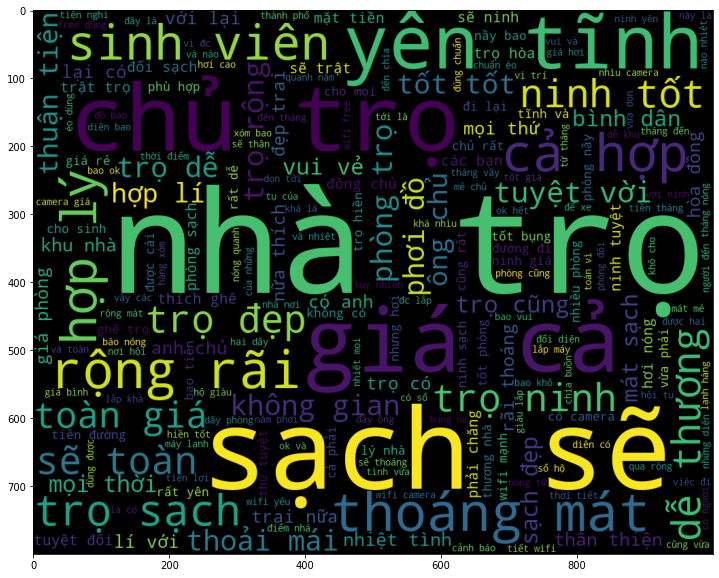

In [32]:
from wordcloud import WordCloud
plt.figure(figsize=(15,10))
wc= WordCloud(max_words=200,height= 800, width=1000 ,background_color='black').generate(rev)
plt.imshow(wc)

In [33]:
def sentiment(review):
    if review>=3:
        return '1'
    else:
        return '0'
df['Sentiment']= df['rating'].apply(sentiment)
df

,id_user,id_motels,rating,views,Sentiment,Word_count,Polarity,Subjectivity,Review_new
0,0,0,4,"nhà trọ đẹp, chủ trọ tốt tính vui vẻ, an ninh ...",1,21,0.0,0.0,nhà trọ đẹp chủ trọ tốt tính vui vẻ ninh tốt p...
1,1,0,2,Vị trí Mặt tiền đường Trần Nam Phú (Lộ ngân hà...,0,20,0.0,0.0,vị trí mặt tiền đường trần nam phú lộ ngân hàn...
2,2,0,3,nhà trọ toàn nữ. Nhà tui chứ đâu kkk,1,9,0.0,0.0,nhà trọ toàn nữ nhà tui chứ đâu kkk
3,3,0,5,Thoáng mát. Giá bình dân,1,5,0.0,0.0,thoáng mát giá bình dân
4,4,1,5,"Nhà trọ sạch sẽ, an toàn giá cả hợp lí, với lạ...",1,22,0.5,1.0,nhà trọ sạch sẽ toàn giá cả hợp lí với lại có ...
...,...,...,...,...,...,...,...,...,...
2440,318,403,3,"Qua rộng, mát mẻ, chủ trọ hiền, tốt bụng ok hế...",1,40,0.5,0.5,qua rộng mát mẻ chủ trọ hiền tốt bụng ok hết ở...
2441,319,403,3,"Nhà trọ sạch sẽ, an toàn giá cả hợp lí, với lạ...",1,38,0.5,1.0,nhà trọ sạch sẽ toàn giá cả hợp lí với lại có ...
2442,320,403,4,"Nhà trọ hiện đại, sạch sẽ, an ninh, yên tĩnh, ...",1,25,0.0,0.0,nhà trọ hiện đại sạch sẽ ninh yên tĩnh đường t...
2443,321,403,3,"Mọi thứ tuyệt vời. An ninh, sạch sẽ, thân thiệ...",1,18,0.0,0.0,mọi thứ tuyệt vời ninh sạch sẽ thân thiện sạch...


In [ ]:
#df.to_csv('2.csv',encoding="utf-8-sig",index=False)
#len(data)

In [ ]:
#nationsGrp.groups

In [ ]:
#subsetting dataset
#data=df[['id_motels','Sentiment']]
#data

In [ ]:
#dt=data.query('id_motels=="16"')
#dt

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk import word_tokenize

In [35]:
X= df['Review_new']
y= df['Sentiment']

X_train, X_test,y_train, y_test= train_test_split(X, y, test_size=0.3, stratify=y)

In [36]:
X_train

1313    nhà trọ có camera ninh giờ tự có khóa cổng chí...
645     trọ ninh tuyệt đối sạch sẽ trật trọ hòa đồng c...
887                                   sạch sẽ thoanga mát
2366    nhà trọ thoát mát sạch đẹp luôn không gia yên ...
578     toàn rộng rãi giá cả hợp lý nhà trọ giá sinh v...
                              ...                        
2390                         bình thường tiền nào của nấy
884     nhà chọ thuên hương mình sống ở đây hơn năm rồ...
663                     nha tro moi sach dep gia binh dan
2102    giá phòng tầm cô chủ trọ thân thiện tốt bụng p...
1914    nhà trọ sạch sẽ toàn giá cả hợp lí với lại có ...
Name: Review_new, Length: 1711, dtype: object

In [37]:
y_train

1313    1
645     1
887     0
2366    1
578     1
       ..
2390    1
884     1
663     1
2102    0
1914    1
Name: Sentiment, Length: 1711, dtype: object

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [39]:
tfidf= TfidfVectorizer(max_features=10000, tokenizer= word_tokenize,ngram_range=(1,2) )
X_train_transformed= tfidf.fit_transform(X_train.values)
X_test_transformed= tfidf.transform(X_test.values)

In [40]:
X_train_transformed.shape

(1711, 3177)

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier()
rfc.fit(X_train_transformed, y_train)
y_pred= rfc.predict(X_test_transformed)

rfc.score(X_test_transformed, y_test)

0.8392370572207084

In [42]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()
lr.fit(X_train_transformed, y_train)
y_pred= lr.predict(X_test_transformed)

lr.score(X_test_transformed, y_test)

0.8664850136239782

In [43]:
vectorizer = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS)
X_train,X_test,Y_train,Y_test = train_test_split(vectorizer.fit_transform(df['views']).toarray(),
                                                 df['Sentiment'].values,
                                                 test_size = 0.2,
                                                 random_state=42)

In [44]:
clf = LogisticRegression(solver='liblinear',random_state=0)
clf.fit(X_train,Y_train)
print("Train Accuracy : {:.2f} %".format(accuracy_score(clf.predict(X_train),Y_train)*100))
print("Test Accuracy  : {:.2f} %".format(accuracy_score(clf.predict(X_test),Y_test)*100))

Train Accuracy : 86.81 %
Test Accuracy  : 87.12 %


In [69]:
for i in range (0,100):
  vectorizer = TfidfVectorizer(stop_words=text.ENGLISH_STOP_WORDS)
  X_train,X_test,Y_train,Y_test = train_test_split(vectorizer.fit_transform(df['views']).toarray(),
                                                 df['Sentiment'].values,
                                                 test_size = 0.3,
                                                 random_state=42 + i)
  
  clf = LogisticRegression(solver='liblinear',random_state= i)
  clf.fit(X_train,Y_train)
  
  rfc= RandomForestClassifier()
  rfc.fit(X_train,Y_train)
  print("Lân thứ ", i)
  print("Train Accuracy LogisticRegression : {:.2f} %".format(accuracy_score(clf.predict(X_train),Y_train)*100))
  print("Test Accuracy  LogisticRegression: {:.2f} %".format(accuracy_score(clf.predict(X_test),Y_test)*100))
  print("Train Accuracy RandomForestClassifier: {:.2f} %".format(accuracy_score(rfc.predict(X_train),Y_train)*100))
  print("Test Accuracy  RandomForestClassifier: {:.2f} %".format(accuracy_score(rfc.predict(X_test),Y_test)*100))
  print("\n")


Lân thứ  0
Train Accuracy LogisticRegression : 86.97 %
Test Accuracy  LogisticRegression: 86.65 %
Train Accuracy RandomForestClassifier: 87.96 %
Test Accuracy  RandomForestClassifier: 84.20 %


Lân thứ  1
Train Accuracy LogisticRegression : 86.67 %
Test Accuracy  LogisticRegression: 86.78 %
Train Accuracy RandomForestClassifier: 88.84 %
Test Accuracy  RandomForestClassifier: 83.92 %


Lân thứ  2
Train Accuracy LogisticRegression : 86.56 %
Test Accuracy  LogisticRegression: 87.06 %
Train Accuracy RandomForestClassifier: 88.43 %
Test Accuracy  RandomForestClassifier: 84.47 %


Lân thứ  3
Train Accuracy LogisticRegression : 87.14 %
Test Accuracy  LogisticRegression: 85.56 %
Train Accuracy RandomForestClassifier: 88.78 %
Test Accuracy  RandomForestClassifier: 82.70 %


Lân thứ  4
Train Accuracy LogisticRegression : 87.20 %
Test Accuracy  LogisticRegression: 85.56 %
Train Accuracy RandomForestClassifier: 89.07 %
Test Accuracy  RandomForestClassifier: 82.83 %


Lân thứ  5
Train Accuracy Logi

In [ ]:
# empty = []

# for i in df.itertuples():
#     if type(review) == str:
#         if review.isspace():
#             empty.append(i) # will take the index of that review
            
            
# print(f"There are total {len(empty)} empty strings as review.")

There are total 0 empty strings as review.


In [ ]:
# Gán Id cho tất cả các từ duy nhất có trong cột views
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(df['views'])

In [ ]:
# Tổng số từ duy nhất có trong tất cả các bản tóm tắt được kết hợp
vocab_size = len(tokenizer.index_word)

# tokenizer.index word là một từ điển có thể được sử dụng để xem tất cả các từ duy nhất và có ID.

print(f'There are total {vocab_size} unique words present')

There are total 862 unique words present


In [ ]:
# Thay thế từng từ trong bài đánh giá bằng mã thông báo tương ứng
sequences = tokenizer.texts_to_sequences(df['views'])
tokenizer.index_word

In [ ]:
# Tạo mô hình RNN-NLP, mỗi đầu vào phải có độ dài bằng nhau
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Giữ độ dài của đầu vào là 100. Vì vậy, nếu bất kỳ đầu vào nào có độ dài nhỏ hơn 100, các số 0 thừa sẽ được thêm vào
# Bất kỳ đầu vào nào có độ dài hơn 100 sẽ bị loại bỏ từ thừa.
sequences_padded = pad_sequences(sequences,maxlen=100,padding='post')
sequences_padded

array([[  2,   1,  30, ...,   0,   0,   0],
       [181, 161, 106, ...,   0,   0,   0],
       [  2,   1,  26, ...,   0,   0,   0],
       ...,
       [  2,   1, 184, ...,   0,   0,   0],
       [ 52, 122,  46, ...,   0,   0,   0],
       [  2,   1, 253, ...,   0,   0,   0]], dtype=int32)

In [ ]:
df[['Sentiment']] = df[['Sentiment']].astype('int')
df['Sentiment'].unique()
y = np.array(df['Sentiment'])
y

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
# Các biến đầu vào và đầu ra. Chia dữ liệu thành tập hợp test và train
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(sequences_padded,y,test_size=0.3)

In [ ]:
# Các thư viện để tạo và đào tạo mô hình
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding

In [ ]:
# Mô hình
max_len = 100 # độ dài của mỗi đầu vào
embedding_size = 32

model = Sequential()

model.add(Embedding(vocab_size+1,embedding_size,input_length = max_len))

model.add(LSTM(150,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(150))
model.add(Dropout(0.2))

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 32)           27616     
_________________________________________________________________
lstm (LSTM)                  (None, 100, 150)          109800    
_________________________________________________________________
dropout (Dropout)            (None, 100, 150)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               38656     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0

In [ ]:
# Train mô hình
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=64)

Epoch 1/15
27/27 [==============================] - 21s 629ms/step - loss: 0.4540 - accuracy: 0.8451 - val_loss: 0.3962 - val_accuracy: 0.8651
Epoch 2/15
27/27 [==============================] - 16s 593ms/step - loss: 0.3948 - accuracy: 0.8679 - val_loss: 0.4012 - val_accuracy: 0.8651
Epoch 3/15
27/27 [==============================] - 16s 592ms/step - loss: 0.3977 - accuracy: 0.8679 - val_loss: 0.3948 - val_accuracy: 0.8651
Epoch 4/15
27/27 [==============================] - 16s 596ms/step - loss: 0.3928 - accuracy: 0.8679 - val_loss: 0.4055 - val_accuracy: 0.8651
Epoch 5/15
27/27 [==============================] - 16s 588ms/step - loss: 0.3950 - accuracy: 0.8679 - val_loss: 0.3946 - val_accuracy: 0.8651
Epoch 6/15
27/27 [==============================] - 16s 589ms/step - loss: 0.3948 - accuracy: 0.8679 - val_loss: 0.3995 - val_accuracy: 0.8651
Epoch 7/15
27/27 [==============================] - 16s 586ms/step - loss: 0.3949 - accuracy: 0.8679 - val_loss: 0.3946 - val_accuracy: 0.8651

In [ ]:
metrics = pd.DataFrame(model.history.history)

metrics

,loss,accuracy,val_loss,val_accuracy
0,0.453962,0.845120,0.396182,0.865123
1,0.394770,0.867913,0.401236,0.865123
2,0.397704,0.867913,0.394829,0.865123
3,0.392803,0.867913,0.405520,0.865123
4,0.394966,0.867913,0.394600,0.865123
5,0.394796,0.867913,0.399452,0.865123
6,0.394878,0.867913,0.394565,0.865123
7,0.397031,0.867913,0.396772,0.865123
8,0.393832,0.867913,0.399528,0.862398
9,0.390964,0.869082,0.414233,0.862398


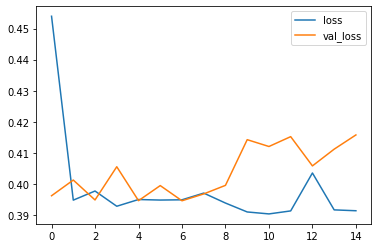

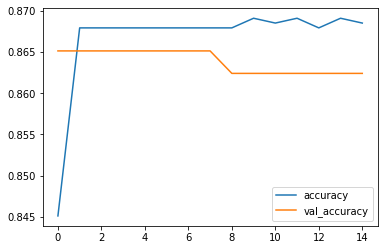

In [ ]:
metrics[['loss','val_loss']].plot()
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
# ví dụ một reviews
neg_review = ['Nhà trọ hơi bì tù do nhiều phòng, giá hơi cao so với phòbg nhưng được cái nước ko ngập, ở 1 mình ok {tùy chổ, phòng mình 800k, có chổ 1 p 2tr3). Chủ trọ không có ở chung nên cũng thoải mái, đóng tiền trọ chễ ko bị la rầy như chổ khác.']



In [ ]:
#mã hóa và thực hiện pad_sequence để làm đúng định dạng được chấp nhận bởi mô hình
neg_review_token = tokenizer.texts_to_sequences(neg_review)

# padding
neg_review_padded = pad_sequences(neg_review_token,maxlen=100,padding='post')

In [ ]:
review_predict = (model.predict(neg_review_padded)>0.5).astype('int32')

In [ ]:
# 1 là đánh giá tích cực và 0 là đánh giá tiêu cực
if review_predict[0] == 0:
    print("Đó là một đánh giá tiêu cực")
else:
    print("Đó là một đánh giá tích cực")

It's a positive review


In [ ]:
#Đánh giá tích cực
pos_review = ["Chủ trọ thân thiện dễ gần vui vẻ, trọ ở yên tĩnh. Phòng trọ rộng rãi thoáng mát, có nhiều camera, đặc biệt có chó giữ nhà rất giỏi."]

#Mã hóa
pos_review = tokenizer.texts_to_sequences(pos_review)

#padding
pos_review = pad_sequences(pos_review,maxlen=100,padding='post')

#dự đoán
review_predict = (model.predict(pos_review)>0.5).astype('int')

if review_predict[0] == 0:
    print("It's a negative review")
else:
    print("It's a positive review")

It's a positive review


In [ ]:
# Dự đoán trên X_test
prediction = (model.predict(X_test)>0.5).astype('int32')
# Đánh giá
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.86      1.00      0.93       635

    accuracy                           0.86       734
   macro avg       0.43      0.50      0.46       734
weighted avg       0.75      0.86      0.80       734

